In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data1_castelmassa = pd.read_csv('Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN


In [131]:
(data1_castelmassa)

,Orario,Level,Variazione,Valore assoluto
0,2008-01-01 00:00,5.91,NaN,5.91
1,2008-01-01 01:00,5.91,0.00,5.91
2,2008-01-01 02:00,5.91,0.00,5.91
3,2008-01-01 03:00,5.91,0.00,5.91
4,2008-01-01 04:00,5.91,0.00,5.91
...,...,...,...,...
134371,2023-04-30 19:00,4.88,0.01,4.88
134372,2023-04-30 20:00,4.88,0.00,4.88
134373,2023-04-30 21:00,4.88,0.00,4.88
134374,2023-04-30 22:00,4.88,0.00,4.88


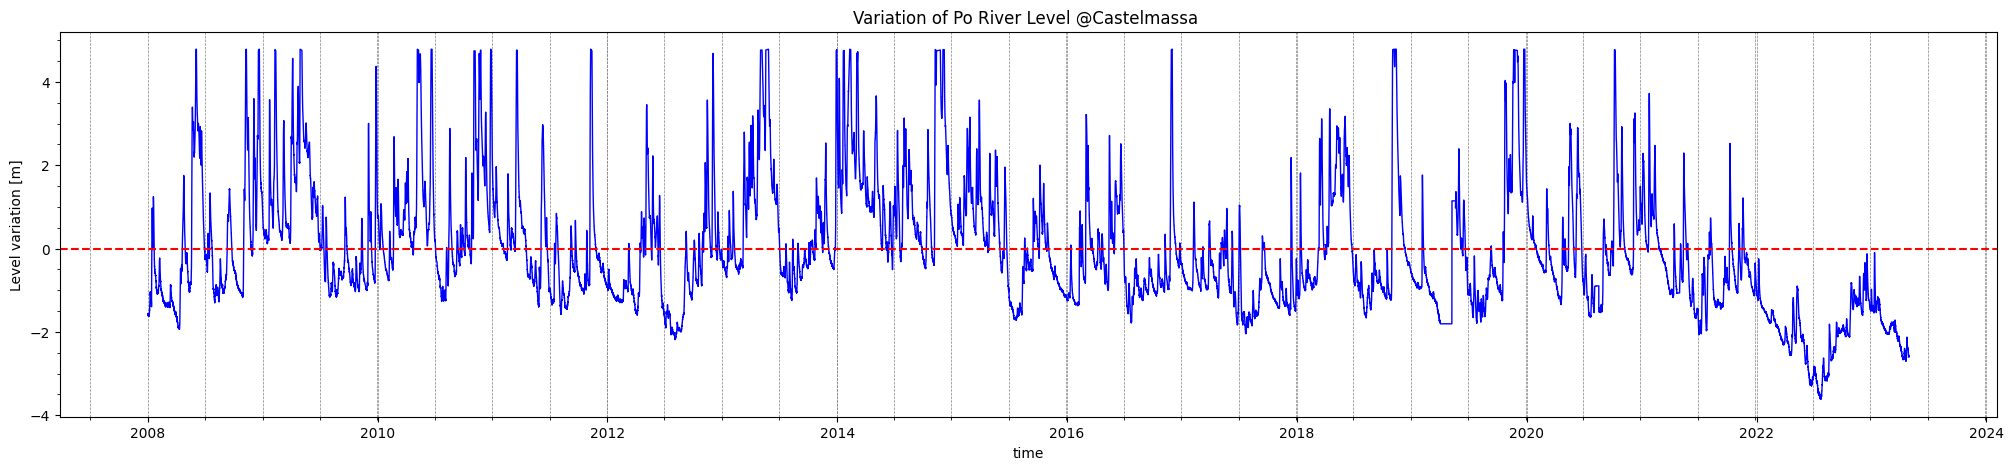

In [132]:
data1_castelmassa.dropna(inplace=True)
data1_castelmassa = data1_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_castelmassa.describe()
#In case it gives error because of non numerical data
data1_castelmassa['Level'] = pd.to_numeric(data1_castelmassa['Level'], errors='coerce')
#Remove outliers
mean=np.mean(data1_castelmassa['Level'])
sigma = np.std(data1_castelmassa['Level'])

#Remove rows with z-score greater than 3
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']> mean-3*sigma]
#no extremes removed for castelmassa

#Obtain the delta Level-Mean
data1_castelmassa['Delta'] = data1_castelmassa['Level']-mean
De=data1_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_castelmassa['Orario'] = pd.to_datetime(data1_castelmassa['Orario'])
# Add a new column with the year extracted from the 'date' column
data1_castelmassa['Year'] = data1_castelmassa['Orario'].dt.year

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


In [133]:
data1_castelmassa['month'] = [i.month for i in data1_castelmassa['Orario']]

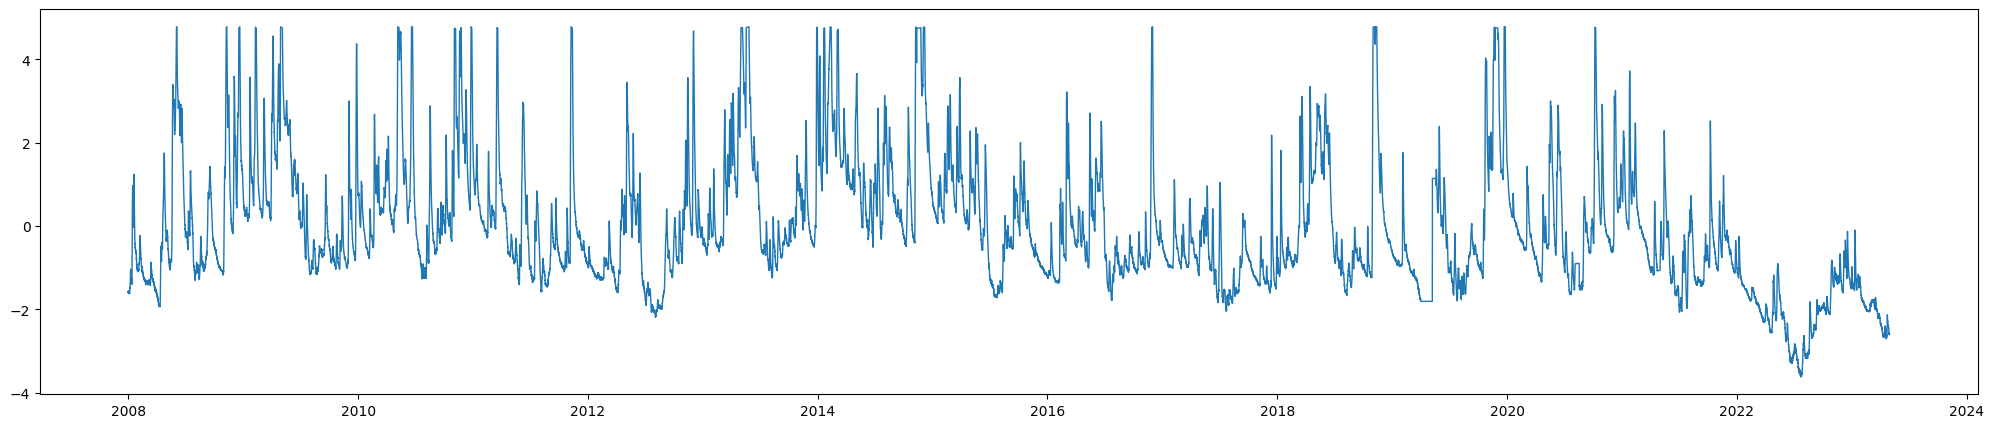

In [134]:
plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'], De, linewidth=1)


In [135]:
df = data1_castelmassa
df['date'] = pd.to_datetime(df['Orario'])  # Convert 'date' column to DateTime
monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Level'].mean()
yearly_avg = monthly_avg.groupby(level=0).mean()

In [136]:
# Convert monthly_avg Series to a DataFrame
df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')

print(df)

     Year Month   Average       Date
0    2008     1  6.798937 2008-01-01
1    2008     2  6.422248 2008-02-01
2    2008     3  6.139312 2008-03-01
3    2008     4  6.844403 2008-04-01
4    2008     5  8.146102 2008-05-01
..    ...   ...       ...        ...
179  2022    12  6.406492 2022-12-01
180  2023     1  6.187473 2023-01-01
181  2023     2  5.546935 2023-02-01
182  2023     3  5.526868 2023-03-01
183  2023     4  4.987097 2023-04-01

[184 rows x 4 columns]


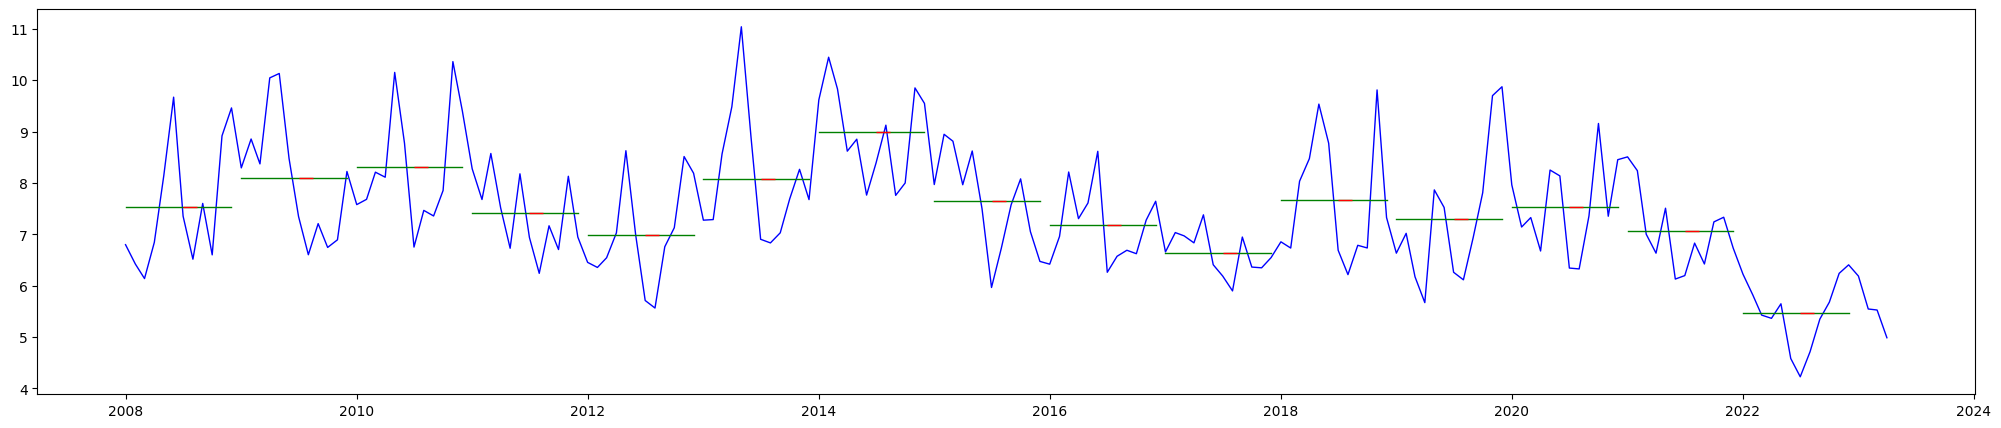

In [137]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i],np.ones(np.size(df['Average'][i-12:i]))*np.mean(df['Average'][i-12:i]),color='green', linewidth=1)

for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-6],np.mean(df['Average'][i-12:i]),color='red', marker=1, markersize=10)


C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  8.25226794e+00
  1.00000000e+00 -7.63031098e-03]


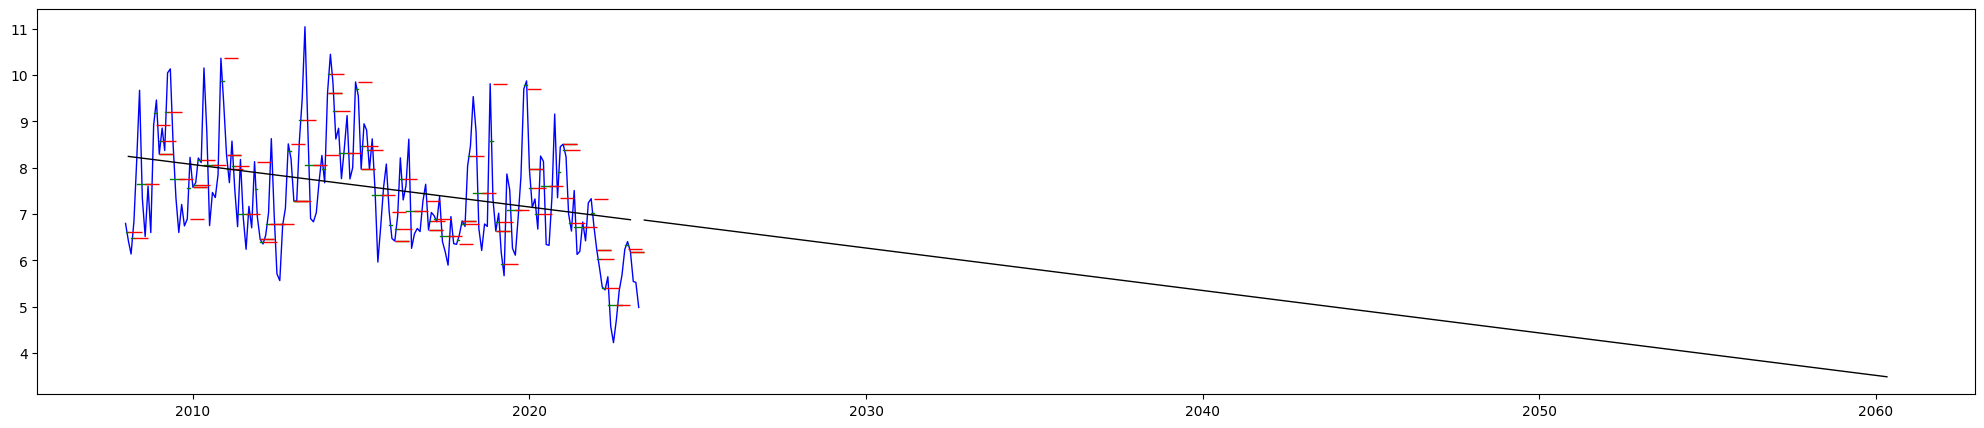

In [138]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Average'][i-12:i-10]))*np.mean(df['Average'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Average'][i-10:i-8]))*np.mean(df['Average'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Average'][i-8:i-2]))*np.mean(df['Average'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Average'][i-2:i]))*np.mean(df['Average'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Average'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Average'][i-12:i-10])) 
    y.append(np.mean(df['Average'][i-10:i-8])) 
    y.append(np.mean(df['Average'][i-8:i-2])) 
    y.append(np.mean(df['Average'][i-2:i-1])) 
    y.append(df['Average'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Average'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Average'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Average'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Average'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Average'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d, e, f):
    return (a*0 + e*x*0) * np.sin(b*x+c) + d +f*x

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d, e, f = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a*2, b, c, d, e, f) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a*2, b, c, d, e, f) ) 

plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


In [139]:
df['Date'][0], y_new[0], y_NEW[-1]

(Timestamp('2008-01-01 00:00:00'), 8.24463763278612, 3.490953893763642)

In [140]:
meany=np.zeros((60-8,2))
k=0
for i in range(0,5*(23-8), 5):
    meany[k,0] = k +2008
    meany[k,1] = np.mean(y_new[i:(i+5)])
    k=k+1
for i in range(0,5*(60-23), 5):
    meany[k,0] = k +2008
    meany[k,1] = np.mean(y_NEW[i:(i+5)])
    k=k+1
meany

array([[2008.        ,    8.20038183],
       [2009.        ,    8.1088181 ],
       [2010.        ,    8.01725437],
       [2011.        ,    7.92569063],
       [2012.        ,    7.8341269 ],
       [2013.        ,    7.74256317],
       [2014.        ,    7.65099944],
       [2015.        ,    7.55943571],
       [2016.        ,    7.46787198],
       [2017.        ,    7.37630824],
       [2018.        ,    7.28474451],
       [2019.        ,    7.19318078],
       [2020.        ,    7.10161705],
       [2021.        ,    7.01005332],
       [2022.        ,    6.91848958],
       [2023.        ,    6.82692585],
       [2024.        ,    6.73536212],
       [2025.        ,    6.64379839],
       [2026.        ,    6.55223466],
       [2027.        ,    6.46067093],
       [2028.        ,    6.36910719],
       [2029.        ,    6.27754346],
       [2030.        ,    6.18597973],
       [2031.        ,    6.094416  ],
       [2032.        ,    6.00285227],
       [2033.        ,   

In [142]:
df[df['Date'].dt.year == 2015]

,Year,Month,Average,Date
84,2015,1,7.969892,2015-01-01
85,2015,2,8.947976,2015-02-01
86,2015,3,8.813096,2015-03-01
87,2015,4,7.965782,2015-04-01
88,2015,5,8.622863,2015-05-01
89,2015,6,7.498387,2015-06-01
90,2015,7,5.965500,2015-07-01
91,2015,8,6.729727,2015-08-01
92,2015,9,7.575211,2015-09-01
93,2015,10,8.080027,2015-10-01


,Year,Month,Average,Date
156,2021,1,8.508260,2021-01-01
157,2021,2,8.239621,2021-02-01
158,2021,3,7.002836,2021-03-01
159,2021,4,6.633847,2021-04-01
160,2021,5,7.508696,2021-05-01
161,2021,6,6.129556,2021-06-01
162,2021,7,6.197298,2021-07-01
163,2021,8,6.829435,2021-08-01
164,2021,9,6.423097,2021-09-01
165,2021,10,7.242460,2021-10-01


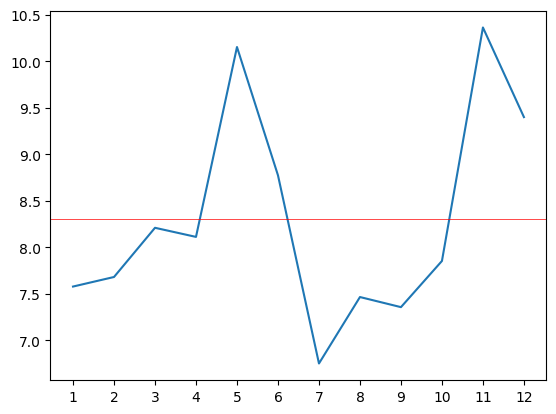

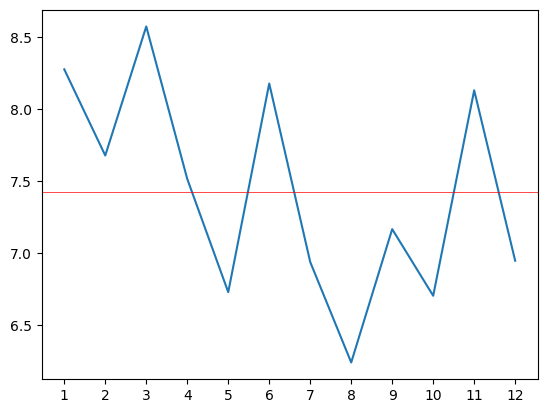

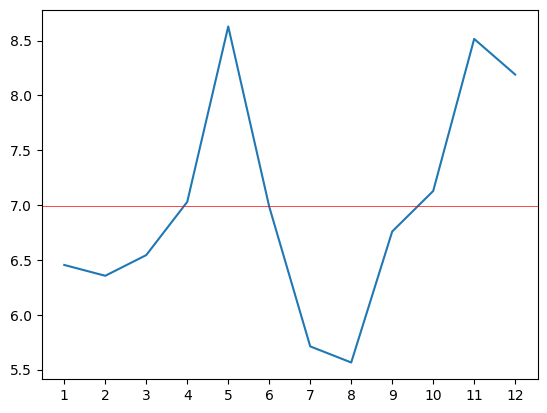

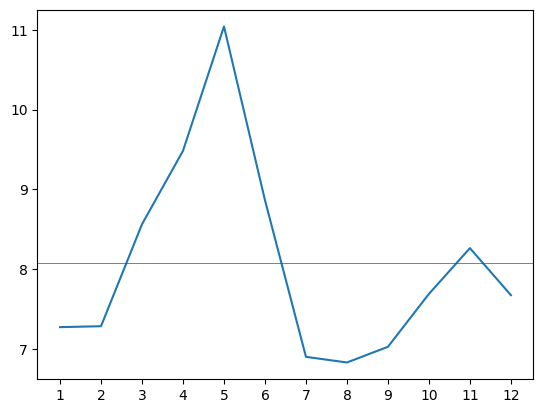

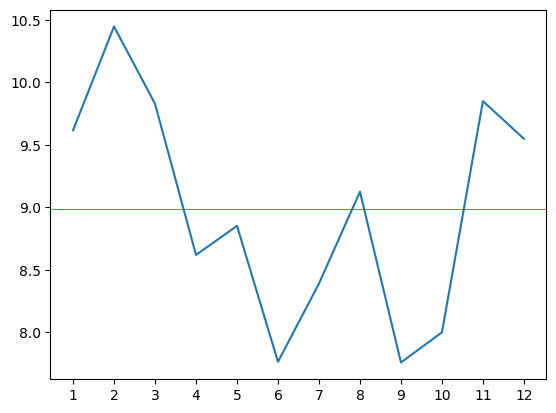

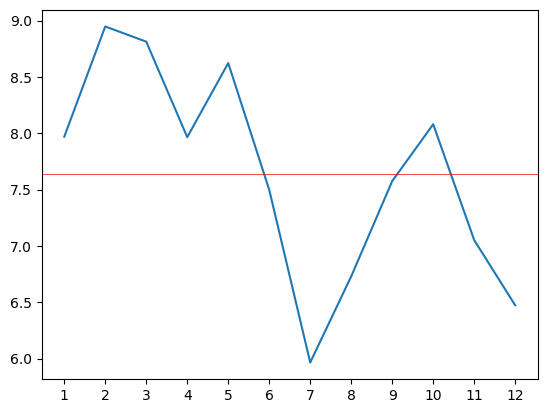

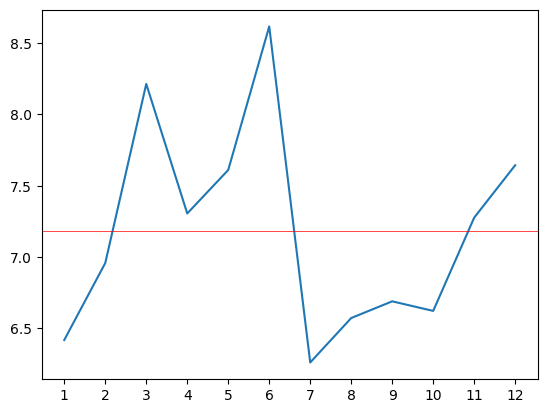

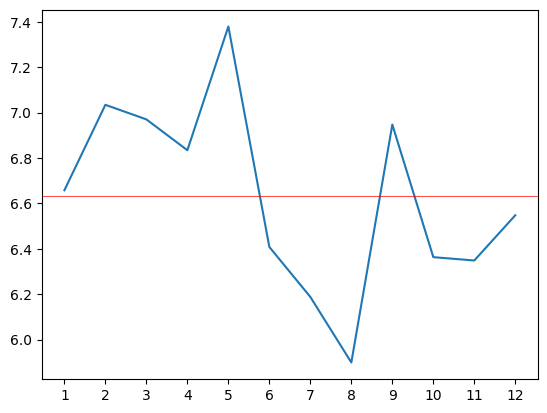

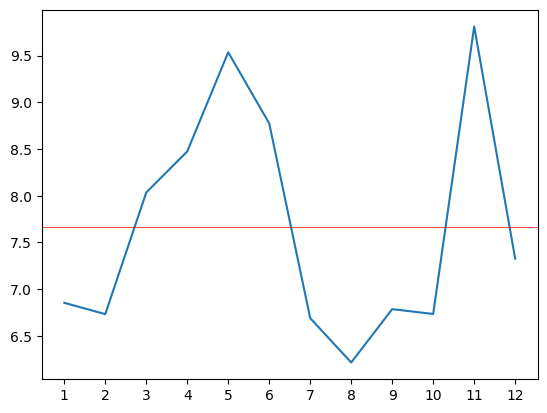

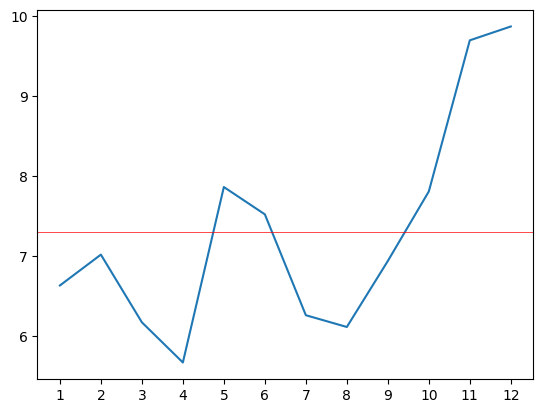

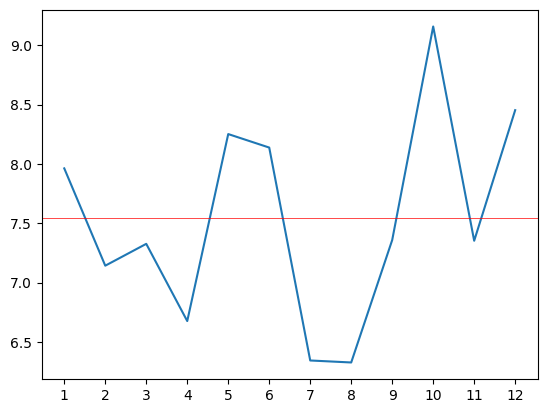

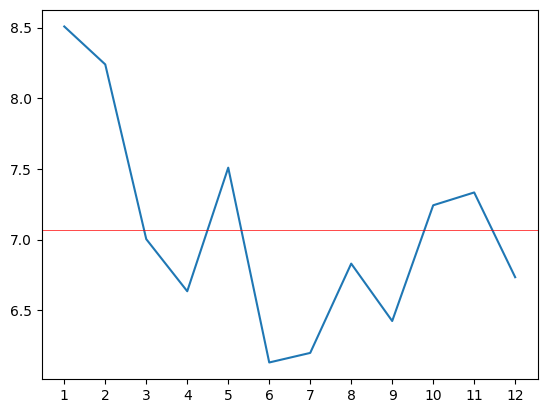

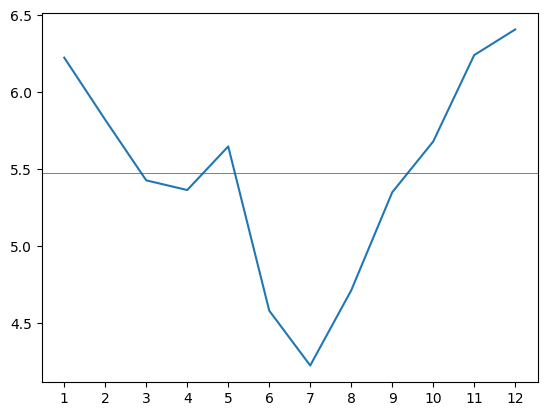

In [152]:
for i in range(2010, 2023):
    df2 = df[df['Date'].dt.year == i]
    plt.plot(df2['Month'], df2['Average'])
    plt.axhline(np.mean(df2['Average']), c='red', linewidth=0.5)
#     plt.ylim((-0.3, 0.3))
    plt.show()

In [144]:
# Funzione da minimizzare
def model(params, x):
    A, B, C, D, E, F, w1, w2, theta1,theta2 = params
#     return (A + B*x + F*x**2) * np.sin(w * x + theta) + C*x + D + E*x**2
    return A * np.sin(w1 * x + theta1) + C*x + D + B * np.sin(w2 * x + theta2)

In [145]:
# Funzione di errore
def error(params, x, y):
    return model(params, x) - y

In [146]:
from scipy.optimize import least_squares

# Dati di input
values = df['Average']  # Inserisci qui i tuoi valori giornalieri
x = np.arange(len(values))  # Creazione dell'array degli indici
y = np.array(values)  # Creazione dell'array dei valori giornalieri

# Parametri iniziali
params0 = np.ones(10)  # Valori iniziali per A, w e theta

# Ottimizzazione
result = least_squares(error, params0, args=(x, y))

print(result.x)

[-0.50210681 -0.2637889  -0.00903168  8.24855282 -7.13595736 -7.57695881
  4.18171427 -2.10725137  2.45419043  0.36397854]


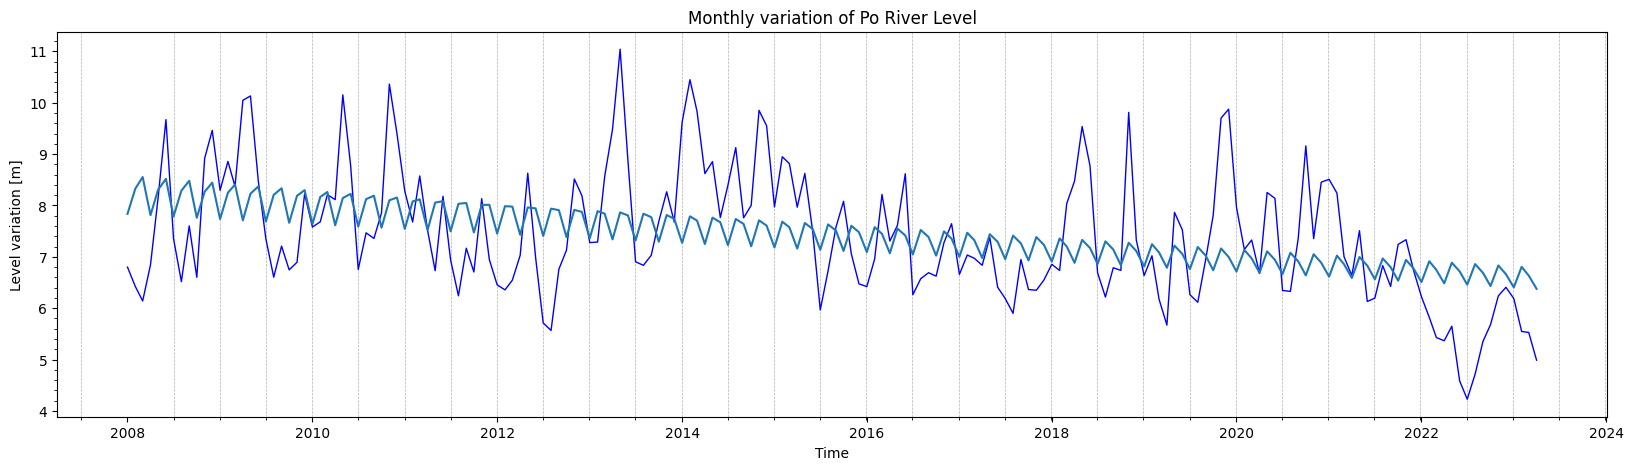

In [147]:
plt.subplots(figsize=(20, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
plt.title('Monthly variation of Po River Level')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

xx=list(range(len(df['Average'])))
sinfx=[]
for x in xx:
    #sinfx.append(-math.sin(math.pi*x/3)*sigma+mean-x*0.005)
    sinfx.append( model(result.x, x) )
plt.plot(df['Date'],sinfx)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)